In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
test_path = '../datasets/foodtruck/foodtruck-rand-hout-tst.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

test_data = arff.load(open(test_path, 'rt'))
col_names = [x[0] for x in test_data['attributes']]
test_data_arr = np.array(test_data['data'])
test_data_arr = np.vstack([np.array(col_names), test_data_arr])
np.savetxt('../datasets/foodtruck/test.csv', train_data_arr, fmt='%s', delimiter=',')
test_df = pd.read_csv('../datasets/foodtruck/test.csv')
test_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
test_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
test_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
test_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in test_df.columns:
    test_df[c] = test_df[c].astype('float')
test_data = test_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

Before converting to spikes: 
Train data shape:  (250, 33)
Test data shape:  (250, 33)


100%|██████████| 250/250 [00:00<00:00, 2533.72it/s]

Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)
Test data shape:  (250, 1, 126)
Test labels shape:  (250, 12)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (90, 1, 126)
Train Labels shape is  (90, 4)
Classes trained are: 0 to 4


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 6
Class 1, class 1 neurons = 3, class 0 neurons = 8
Class 2, class 1 neurons = 2, class 0 neurons = 9
Class 3, class 1 neurons = 4, class 0 neurons = 6


100%|██████████| 5000/5000 [3:07:13<00:00,  2.25s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.197    |
| zero_one_loss       | 0.48     |
| one_error           | 0.008    |
| micro av. jaccard   | 0.555305 |
| macro av. jaccard   | 0.446522 |
| micro av. precision | 0.685237 |
| macro av. precision | 0.572074 |
| micro av. recall    | 0.745455 |
| macro av. recall    | 0.629198 |
| micro av. f1        | 0.714078 |
| macro av. f1        | 0.595821 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.197    |
| zero_one_loss       | 0.48     |
| one_error           | 0.008    |
| micro av. jaccard   | 0.555305 |
| macro av. jaccard   | 0.446522 |
| micro av. precision | 0.685237 |
| macro av. precision | 0.572074 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 10, class 0 neurons = 7
Class 1, class 1 neurons = 5, class 0 neurons = 12
Class 2, class 1 neurons = 4, class 0 neurons = 15
Class 3, class 1 neurons = 7, class 0 neurons = 11
Class 4, class 1 neurons = 3, class 0 neurons = 8
Class 5, class 1 neurons = 2, class 0 neurons = 8
Class 6, class 1 neurons = 2, class 0 neurons = 9
Class 7, class 1 neurons = 3, class 0 neurons = 7


100%|██████████| 5000/5000 [6:17:06<00:00,  4.53s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.064    |
| zero_one_loss       | 0.188    |
| one_error           | 0        |
| micro av. jaccard   | 0.2      |
| macro av. jaccard   | 0.202214 |
| micro av. precision | 0.516129 |
| macro av. precision | 0.615385 |
| micro av. recall    | 0.246154 |
| macro av. recall    | 0.245105 |
| micro av. f1        | 0.333333 |
| macro av. f1        | 0.335714 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.131    |
| zero_one_loss       | 0.604    |
| one_error           | 0        |
| micro av. jaccard   | 0.497121 |
| macro av. jaccard   | 0.316219 |
| micro av. precision | 0.672727 |
| macro av. precision | 0.589929 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 12, class 0 neurons = 7
Class 1, class 1 neurons = 5, class 0 neurons = 13
Class 2, class 1 neurons = 4, class 0 neurons = 18
Class 3, class 1 neurons = 7, class 0 neurons = 14
Class 4, class 1 neurons = 3, class 0 neurons = 8
Class 5, class 1 neurons = 2, class 0 neurons = 8
Class 6, class 1 neurons = 2, class 0 neurons = 10
Class 7, class 1 neurons = 3, class 0 neurons = 7
Class 8, class 1 neurons = 2, class 0 neurons = 8
Class 9, class 1 neurons = 2, class 0 neurons = 8
Class 10, class 1 neurons = 3, class 0 neurons = 7
Class 11, class 1 neurons = 3, class 0 neurons = 6


100%|██████████| 5000/5000 [1:56:06<00:00,  1.39s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.147    |
| zero_one_loss       | 0.436    |
| one_error           | 0.008    |
| micro av. jaccard   | 0.390041 |
| macro av. jaccard   | 0.315813 |
| micro av. precision | 0.566265 |
| macro av. precision | 0.55503  |
| micro av. recall    | 0.556213 |
| macro av. recall    | 0.443569 |
| micro av. f1        | 0.561194 |
| macro av. f1        | 0.471713 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.137333 |
| zero_one_loss       | 0.796    |
| one_error           | 0        |
| micro av. jaccard   | 0.456464 |
| macro av. jaccard   | 0.306104 |
| micro av. precision | 0.640741 |
| macro av. precision | 0.573971 

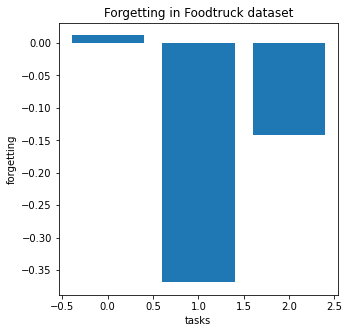

In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': [90, 80, 80], 'labels': [4, 4, 4]},
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (90, 1, 126)
Train Labels shape is  (90, 4)
Classes trained are: 0 to 4


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 9
Class 1, class 1 neurons = 1, class 0 neurons = 10
Class 2, class 1 neurons = 3, class 0 neurons = 8
Class 3, class 1 neurons = 2, class 0 neurons = 9


100%|██████████| 5000/5000 [40:27<00:00,  2.06it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.127    |
| zero_one_loss       | 0.348    |
| one_error           | 0.004    |
| micro av. jaccard   | 0.348718 |
| macro av. jaccard   | 0.296386 |
| micro av. precision | 0.535433 |
| macro av. precision | 0.48339  |
| micro av. recall    | 0.5      |
| macro av. recall    | 0.439161 |
| micro av. f1        | 0.51711  |
| macro av. f1        | 0.450884 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.127    |
| zero_one_loss       | 0.348    |
| one_error           | 0.004    |
| micro av. jaccard   | 0.348718 |
| macro av. jaccard   | 0.296386 |
| micro av. precision | 0.535433 |
| macro av. precision | 0.48339  |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 9
Class 1, class 1 neurons = 1, class 0 neurons = 15
Class 2, class 1 neurons = 5, class 0 neurons = 12
Class 3, class 1 neurons = 2, class 0 neurons = 16
Class 4, class 1 neurons = 6, class 0 neurons = 7
Class 5, class 1 neurons = 2, class 0 neurons = 9
Class 6, class 1 neurons = 3, class 0 neurons = 7
Class 7, class 1 neurons = 6, class 0 neurons = 4


100%|██████████| 5000/5000 [1:36:05<00:00,  1.15s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.181    |
| zero_one_loss       | 0.52     |
| one_error           | 0.008    |
| micro av. jaccard   | 0.522427 |
| macro av. jaccard   | 0.365983 |
| micro av. precision | 0.730627 |
| macro av. precision | 0.601603 |
| micro av. recall    | 0.647059 |
| macro av. recall    | 0.457499 |
| micro av. f1        | 0.686308 |
| macro av. f1        | 0.507128 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.155    |
| zero_one_loss       | 0.724    |
| one_error           | 0        |
| micro av. jaccard   | 0.454225 |
| macro av. jaccard   | 0.310147 |
| micro av. precision | 0.671875 |
| macro av. precision | 0.532394 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 9
Class 1, class 1 neurons = 1, class 0 neurons = 16
Class 2, class 1 neurons = 5, class 0 neurons = 13
Class 3, class 1 neurons = 2, class 0 neurons = 19
Class 4, class 1 neurons = 9, class 0 neurons = 9
Class 5, class 1 neurons = 2, class 0 neurons = 10
Class 6, class 1 neurons = 3, class 0 neurons = 7
Class 7, class 1 neurons = 10, class 0 neurons = 7
Class 8, class 1 neurons = 5, class 0 neurons = 6
Class 9, class 1 neurons = 2, class 0 neurons = 8
Class 10, class 1 neurons = 2, class 0 neurons = 8
Class 11, class 1 neurons = 3, class 0 neurons = 7


100%|██████████| 5000/5000 [2:14:17<00:00,  1.61s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.116    |
| zero_one_loss       | 0.368    |
| one_error           | 0.004    |
| micro av. jaccard   | 0.25641  |
| macro av. jaccard   | 0.257155 |
| micro av. precision | 0.540541 |
| macro av. precision | 0.530082 |
| micro av. recall    | 0.327869 |
| macro av. recall    | 0.339402 |
| micro av. f1        | 0.408163 |
| macro av. f1        | 0.407285 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.144333 |
| zero_one_loss       | 0.852    |
| one_error           | 0        |
| micro av. jaccard   | 0.392707 |
| macro av. jaccard   | 0.27704  |
| micro av. precision | 0.652681 |
| macro av. precision | 0.52417  

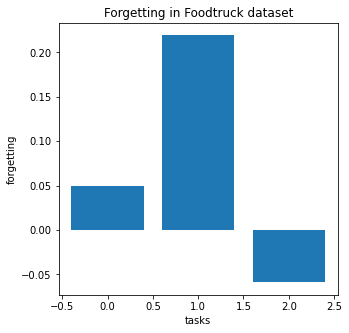

In [4]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': [90, 80, 80], 'labels': [4, 4, 4]},
    'seed': 3,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (90, 1, 126)
Train Labels shape is  (90, 4)
Classes trained are: 0 to 4


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 6
Class 1, class 1 neurons = 1, class 0 neurons = 10
Class 2, class 1 neurons = 4, class 0 neurons = 9
Class 3, class 1 neurons = 1, class 0 neurons = 9


100%|██████████| 5000/5000 [40:20<00:00,  2.07it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.106    |
| zero_one_loss       | 0.312    |
| one_error           | 0        |
| micro av. jaccard   | 0.311688 |
| macro av. jaccard   | 0.29697  |
| micro av. precision | 0.489796 |
| macro av. precision | 0.496536 |
| micro av. recall    | 0.461538 |
| macro av. recall    | 0.433876 |
| micro av. f1        | 0.475248 |
| macro av. f1        | 0.456548 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.106    |
| zero_one_loss       | 0.312    |
| one_error           | 0        |
| micro av. jaccard   | 0.311688 |
| macro av. jaccard   | 0.29697  |
| micro av. precision | 0.489796 |
| macro av. precision | 0.496536 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 7, class 0 neurons = 11
Class 1, class 1 neurons = 1, class 0 neurons = 15
Class 2, class 1 neurons = 4, class 0 neurons = 9
Class 3, class 1 neurons = 2, class 0 neurons = 14
Class 4, class 1 neurons = 4, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 8
Class 6, class 1 neurons = 6, class 0 neurons = 7
Class 7, class 1 neurons = 6, class 0 neurons = 4


100%|██████████| 5000/5000 [1:18:03<00:00,  1.07it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.203    |
| zero_one_loss       | 0.556    |
| one_error           | 0        |
| micro av. jaccard   | 0.527907 |
| macro av. jaccard   | 0.444742 |
| micro av. precision | 0.718354 |
| macro av. precision | 0.653204 |
| micro av. recall    | 0.665689 |
| macro av. recall    | 0.575547 |
| micro av. f1        | 0.69102  |
| macro av. f1        | 0.600362 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.155    |
| zero_one_loss       | 0.712    |
| one_error           | 0        |
| micro av. jaccard   | 0.465517 |
| macro av. jaccard   | 0.358542 |
| micro av. precision | 0.666667 |
| macro av. precision | 0.570548 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 7, class 0 neurons = 13
Class 1, class 1 neurons = 1, class 0 neurons = 16
Class 2, class 1 neurons = 4, class 0 neurons = 9
Class 3, class 1 neurons = 2, class 0 neurons = 15
Class 4, class 1 neurons = 4, class 0 neurons = 9
Class 5, class 1 neurons = 3, class 0 neurons = 8
Class 6, class 1 neurons = 9, class 0 neurons = 10
Class 7, class 1 neurons = 10, class 0 neurons = 7
Class 8, class 1 neurons = 3, class 0 neurons = 7
Class 9, class 1 neurons = 2, class 0 neurons = 8
Class 10, class 1 neurons = 2, class 0 neurons = 7
Class 11, class 1 neurons = 3, class 0 neurons = 7


100%|██████████| 5000/5000 [1:58:10<00:00,  1.42s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.097    |
| zero_one_loss       | 0.34     |
| one_error           | 0        |
| micro av. jaccard   | 0.448864 |
| macro av. jaccard   | 0.343729 |
| micro av. precision | 0.580882 |
| macro av. precision | 0.537302 |
| micro av. recall    | 0.663866 |
| macro av. recall    | 0.489957 |
| micro av. f1        | 0.619608 |
| macro av. f1        | 0.501899 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.141333 |
| zero_one_loss       | 0.844    |
| one_error           | 0        |
| micro av. jaccard   | 0.430872 |
| macro av. jaccard   | 0.323934 |
| micro av. precision | 0.639442 |
| macro av. precision | 0.534709 

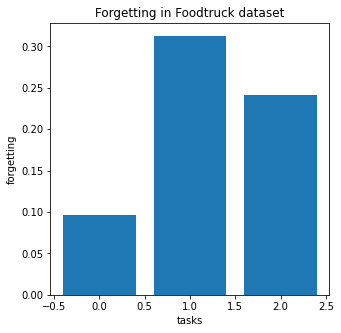

In [5]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': [90, 80, 80], 'labels': [4, 4, 4]},
    'seed': 4,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)